In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_bigtrain, y_bigtrain), (x_test, y_test) = cifar10.load_data()

y_bigtrain = y_bigtrain.ravel()
y_test = y_test.ravel()

#split the data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_bigtrain, y_bigtrain, test_size=0.2, stratify=y_bigtrain, random_state=42)

images_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(images_classes)

x_train = np.array(x_train, np.float32)
x_train = x_train / 255.

x_val = np.array(x_val, np.float32)
x_val = x_val / 255.

x_test = np.array(x_test, np.float32)
x_test = x_test / 255.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


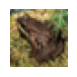

frog




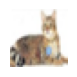

cat




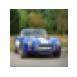

automobile




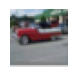

automobile




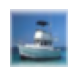

ship




In [ ]:
total_number_of_images = x_train.shape[0]
number_of_images = 5 # number of images to display

for i in range(number_of_images):
    nomer_of_image = randint(1, total_number_of_images)
    plt.figure(figsize=(.75, .75))
    plt.imshow(x_train[nomer_of_image])
    plt.axis('off')
    plt.show()

    print(images_classes[y_train[nomer_of_image]])
    print()
    print()

In [ ]:
print()
print(f'x_train Shape: {x_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print()
print(f'x_val Shape: {x_val.shape}')
print(f'y_val Shape: {y_val.shape}')
print()
print(f'x_test Shape: {x_test.shape}')
print(f'y_test Shape: {y_test.shape}')


x_train Shape: (40000, 32, 32, 3)
y_train Shape: (40000,)

x_val Shape: (10000, 32, 32, 3)
y_val Shape: (10000,)

x_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.3024 - loss: 2.0734 - val_accuracy: 0.4714 - val_loss: 1.5302
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.4550 - loss: 1.5083 - val_accuracy: 0.5408 - val_loss: 1.3137
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5126 - loss: 1.3702 - val_accuracy: 0.5532 - val_loss: 1.3223
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5478 - loss: 1.2805 - val_accuracy: 0.5427 - val_loss: 1.3545
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5698 - loss: 1.2258 - val_accuracy: 0.5920 - val_loss: 1.1941
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5933 - loss: 1.1556 - val_accuracy: 0.5932 - val_loss: 1.1735
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6040 - loss: 1.1281 - val_accuracy: 0.5978 - val_loss: 1.2221
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6183 - loss: 1.09

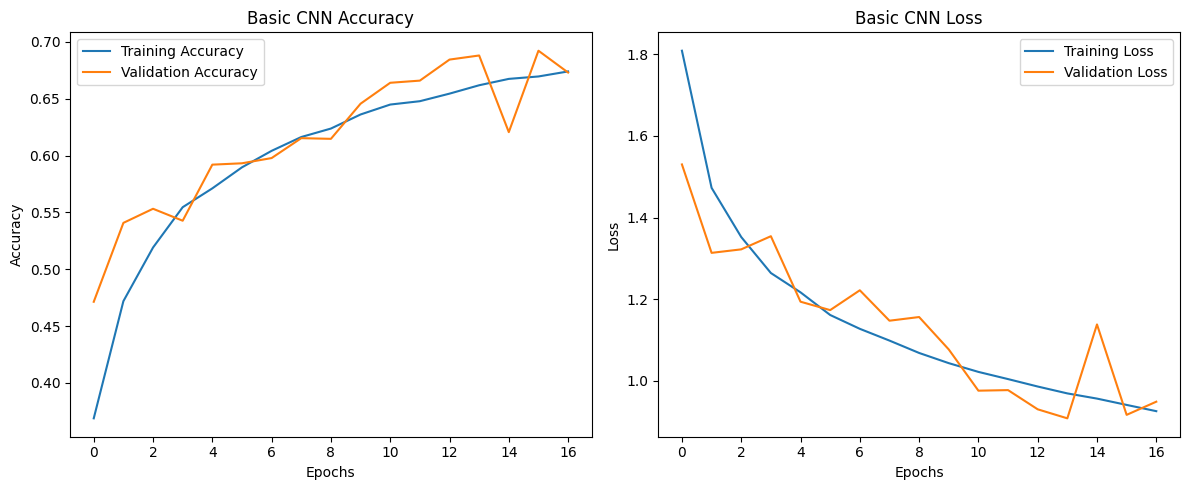

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Define a simple CNN model for baseline performance
def build_basic_cnn(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Train and evaluate the basic CNN model
input_shape = (32, 32, 3)
batch_size = 32

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)
datagen.fit(x_train)

basic_cnn = build_basic_cnn(input_shape, num_classes)
basic_cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
basic_history = basic_cnn.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              validation_data=(x_val, y_val),
                              epochs=25,
                              callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                              verbose=1)

# Plot training and validation accuracy/loss for basic CNN
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(basic_history.history['accuracy'], label='Training Accuracy')
plt.plot(basic_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(basic_history.history['loss'], label='Training Loss')
plt.plot(basic_history.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.1697 - loss: 2.1121 - val_accuracy: 0.3315 - val_loss: 1.7245
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - accuracy: 0.3551 - loss: 1.6475 - val_accuracy: 0.4339 - val_loss: 1.4259
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.4601 - loss: 1.4062 - val_accuracy: 0.5551 - val_loss: 1.2206
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.5572 - loss: 1.2169 - val_accuracy: 0.6003 - val_loss: 1.1233
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.6172 - loss: 1.0660 - val_accuracy: 0.6320 - val_loss: 1.0489
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.6583 - loss: 0.9567 - val_accuracy: 0.6869 - val_loss: 0.8929
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.6914 - loss: 0.8780 - val_accuracy: 0.6846 - val_loss: 0.8999
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7171 -

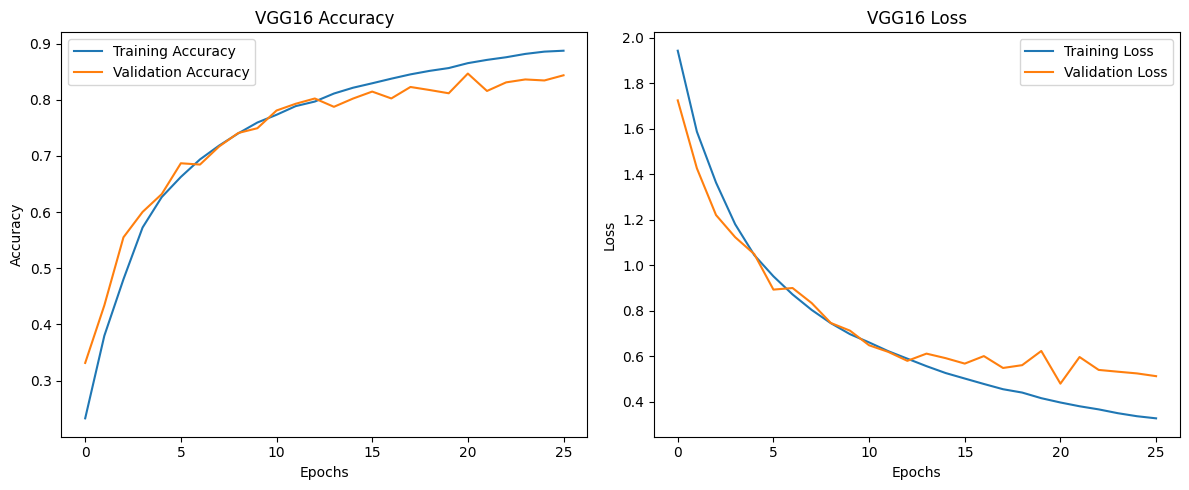

In [ ]:
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def build_model(base_model, num_classes, input_shape):
    base_model = base_model(input_shape=input_shape, include_top=False, weights=None)
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Set parameters
input_shape = (32, 32, 3)
batch_size = 32
epochs = 30

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train and evaluate VGG16 models
models_histories = {}
models_val_accuracies = {}

# Define vgg16
vgg16_model = build_model(VGG16, num_classes, input_shape)

# Compile model
vgg16_model.compile(optimizer=Adam(learning_rate=1e-4),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train vgg16 and save history
vgg16_history = vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                validation_data=(x_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=[early_stopping],
                verbose=1)
models_histories['VGG16'] = vgg16_history
models_val_accuracies['VGG16'] = max(vgg16_history.history['val_accuracy'])

# Plot training and validation accuracy/loss for vgg16
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("VGG16 Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title(f"VGG16 Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.2897 - loss: 2.0543 - val_accuracy: 0.4205 - val_loss: 1.5969
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.4332 - loss: 1.5552 - val_accuracy: 0.4741 - val_loss: 1.4827
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.4867 - loss: 1.4304 - val_accuracy: 0.5253 - val_loss: 1.3308
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.5206 - loss: 1.3310 - val_accuracy: 0.5425 - val_loss: 1.2878
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.5586 - loss: 1.2418 - val_accuracy: 0.5577 - val_loss: 1.3104
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.5875 - loss: 1.1540 - val_accuracy: 0.6035 - val_loss: 1.1141
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6153 - loss: 1.0796 - val_accuracy: 0.5875 - val_loss: 1.1945
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.6391 -

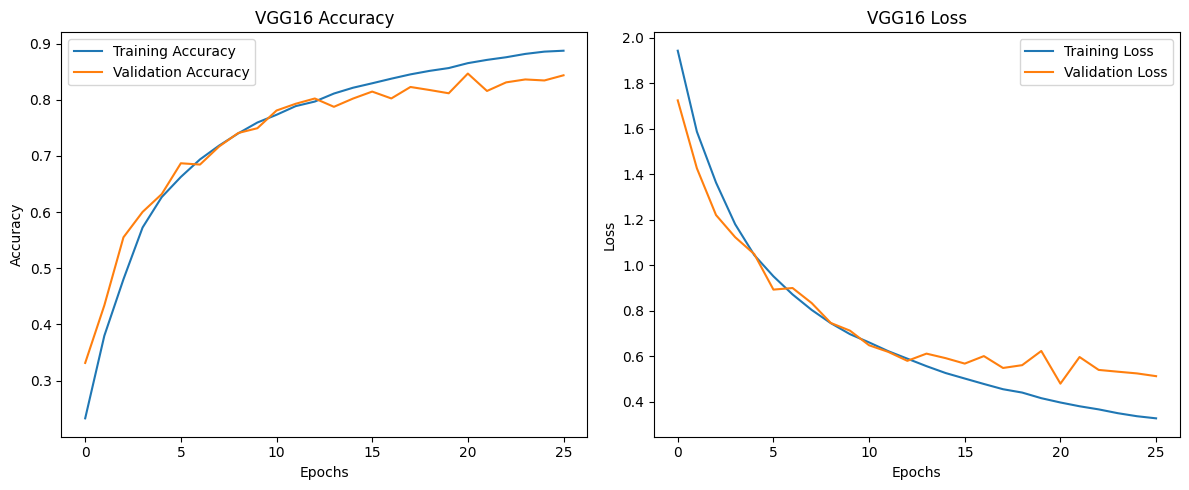

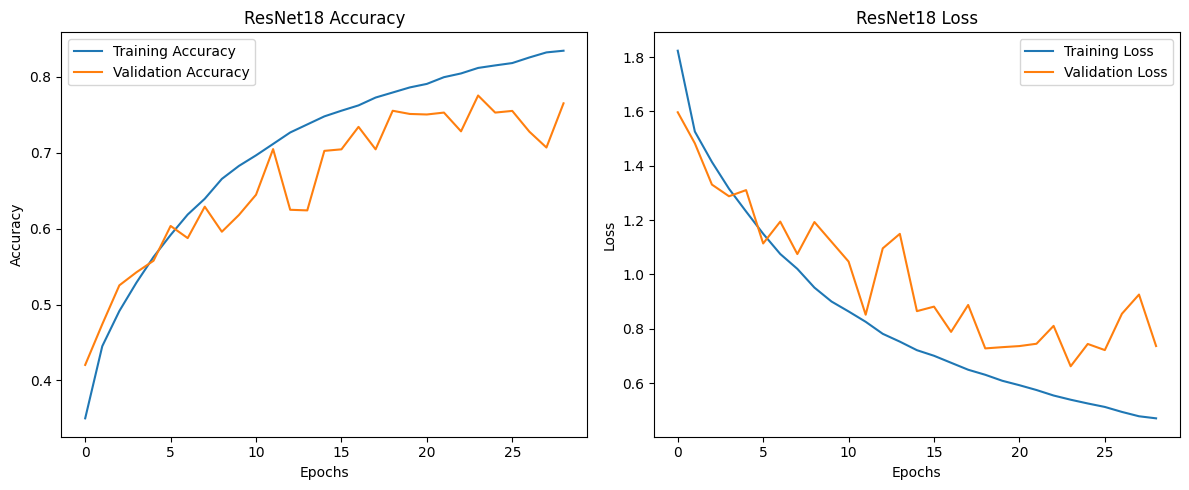

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

def residual_block(x, filters, downsample=False):
    # If downsampling is required
    shortcut = x

    if downsample or x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=2 if downsample else 1, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Convolutional layer of the main path
    x = Conv2D(filters, (3, 3), strides=2 if downsample else 1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # residual connection
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x


def build_resnet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # initial convolution layer
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # residual block
    x = residual_block(x, 64)
    x = residual_block(x, 64, downsample=True)
    x = residual_block(x, 128)
    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 256)
    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 512)
    x = residual_block(x, 512, downsample=True)

    # global average pooling layer
    x = GlobalAveragePooling2D()(x)

    # output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


# Define model
resnet18_model = build_resnet18(input_shape=input_shape, num_classes=num_classes)

# Compile model
for model in [resnet18_model]:
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train model and save history
for model_name, model in zip(['ResNet18'], [resnet18_model]):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping],
                        verbose=1)
    models_histories[model_name] = history
    models_val_accuracies[model_name] = max(history.history['val_accuracy'])

# Plot training and validation accuracy/loss for model
for model_name, history in models_histories.items():
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Select the best model based on validation accuracy
best_model_name = max(models_val_accuracies, key=models_val_accuracies.get)
print(f"Best model based on validation accuracy: {best_model_name} with accuracy: {models_val_accuracies[best_model_name]:.4f}")

Best model based on validation accuracy: VGG16 with accuracy: 0.8466


In [14]:
from keras.optimizers import Adam, Nadam

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


# Hyperparameter tuning on the best model
learning_rates = [1e-4, 5e-5, 1e-5]
optimizers = [Adam, Nadam]

best_vgg16_val_acc = 0
best_tuned_vgg16_model = None
best_tuned_vgg16_history = None
best_tuned_vgg16_params = {}

for lr, opt in product(learning_rates, optimizers):
    print(f"Tuning with model name: VGG16, learning rate: {lr}, optimizer: {opt.__name__}")
    model = build_model(VGG16, num_classes, input_shape)
    model.compile(optimizer=opt(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[],
                        verbose=1)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_vgg16_val_acc:
        best_vgg16_val_acc = val_acc
        best_tuned_vgg16_model = model
        best_tuned_vgg16_history = history
        best_tuned_vgg16_params = {'learning_rate': lr, 'optimizer': opt.__name__}

best_resnet18_val_acc = 0
best_tuned_resnet18_model = None
best_tuned_resnet18_history = None
best_tuned_resnet18_params = {}

for lr, opt in product(learning_rates, optimizers):
    print(f"Tuning with model name: ResNet18, learning rate: {lr}, optimizer: {opt.__name__}")
    model = build_resnet18(input_shape=input_shape, num_classes=num_classes)
    model.compile(optimizer=opt(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[],
                        verbose=1)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_resnet18_val_acc:
        best_resnet18_val_acc = val_acc
        best_tuned_resnet18_model = model
        best_tuned_resnet18_history = history
        best_tuned_resnet18_params = {'learning_rate': lr, 'optimizer': opt.__name__}



Tuning with model name: VGG16, learning rate: 0.0001, optimizer: Adam
Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.1278 - loss: 2.2169 - val_accuracy: 0.3114 - val_loss: 1.7681
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.3319 - loss: 1.7081 - val_accuracy: 0.4278 - val_loss: 1.5208
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.4708 - loss: 1.4204 - val_accuracy: 0.5292 - val_loss: 1.2872
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.5525 - loss: 1.2251 - val_accuracy: 0.6220 - val_loss: 1.0420
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6115 - loss: 1.0778 - val_accuracy: 0.6438 - val_loss: 0.9845
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6502 - loss: 0.9733 - val_accuracy: 0.6803 - val_loss: 0.9029
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.6743 - loss: 0.9094 - val_accuracy: 0.6721 - val_loss: 0.9534
Epoch 

In [15]:
print(f"Best tuned vgg16 model based on validation accuracy: lr: {best_tuned_vgg16_params['learning_rate']}, opt: {best_tuned_vgg16_params['optimizer']} with accuracy: {best_vgg16_val_acc}")
print(f"Best tuned resnet18 model based on validation accuracy: lr: {best_tuned_resnet18_params['learning_rate']}, opt: {best_tuned_resnet18_params['optimizer']} with accuracy: {best_resnet18_val_acc}")

Best tuned vgg16 model based on validation accuracy: lr: 0.0001, opt: Nadam with accuracy: 0.8671000003814697
Best tuned resnet18 model based on validation accuracy: lr: 0.0001, opt: Adam with accuracy: 0.7994999885559082


In [16]:
# Evaluate the best tuned model on the test set
vgg16_test_loss, vgg16_test_acc = best_tuned_vgg16_model.evaluate(x_test, y_test, verbose=0)
print(f"Best Tuned vgg16 Model Test Accuracy: {vgg16_test_acc}")

resnet18_test_loss, resnet18_test_acc = best_tuned_resnet18_model.evaluate(x_test, y_test, verbose=0)
print(f"Best Tuned resnet18 Model Test Accuracy: {resnet18_test_acc}")


Best Tuned vgg16 Model Test Accuracy: 0.8543000221252441
Best Tuned resnet18 Model Test Accuracy: 0.7508000135421753
